## **Задача 1**

Напишите функцию умножения трёх матриц (не пользуйтесь встроенными функциями такими как  np.dot(), @)

**Решение:**

In [ ]:
 # Подключает библиотеку numpy и присваеваем ей короткое имя np
 import numpy as np

Вступление: 
    Функция получилось довольно большая, но это для того чтобы перебрать все варианты. То есть независимо какие были поданы матрицы на вход функции и самое главное независимо в каком порядке. То в любом случаи будет результат.
    Например можно благодаря встроенной в библиотеку функции умножить (4,3) @ (3,5). Но наоборот уже нельзя. 
  
    Данная функция перебирает все варианты.
  Здесь 5 ветвей:
 
 
 1-ветвь: Смотрит можно ли умножить первую матрицу на вторую и далее на третью. Или же третью на результ первой со второй.
 
  2- ветвь: Можно ли умножить первую на третью. И аналогично на вторую или наоборот
  
  3-ветвь: Можно ли вторую на первую, а потом на третью
  
  4-ветвь: Можно ли вторую на третью, а следом на первую
 
  5-ветвь: Можно ли третью на первую, а потом на вторую.
Соответвенно возможные комбинации уменьшаются. И в конце проверять уже меньше. 

In [ ]:
def prod_three_matrix(matrix1, matrix2, matrix3):

  shape1 = matrix1.shape
  shape2 = matrix2.shape
  shape3 = matrix3.shape

  # Ветвь - 1  (Умножение первой на вторую матриц. И далее возможность умножить на третью. Или третью на результат (1 и 2) )

  # Если можно умножить первую матрицу на вторую  
  if (shape1[1] == shape2[0]):                                 # Смотрим возможность умножения матриц (сраниваем размеры столбцов матрицы 1 и строк матрицы 2)
    intermediate_matrix = np.zeros((shape1[0], shape2[1]))     # Создаем нулевую матрицу с размерами равную кол-ву строк матрицы 1 и столбцов матрицы 2 (промежуточная матрица)
    for i in range(shape1[0]):                                 # Делаем основной цикл чтобы перебирать строки первой матрицы
      for j in range(shape2[1]):                               # Делаем вложенный цикл и уже проходим по столбцу второй матрицы
        hoarder = 0                                            # Создаем переменную накопитель, которая будет временно хранить значение результа умножения 
        for n in range(shape1[1]):                             # Еще один вложенный цикл нужен чтобы проходит по элементам каждой из строк первой матрицы
          hoarder += matrix1[i,n] * matrix2[n,j]               # Суммируем результат умножения 
        intermediate_matrix[i,j] = hoarder                     # Присваеваем результат текущей ячейки новой матрицы из накопителя

    
    # Если можно умножить результат (1 и 2) на третью матрицу   # Алгоритм аналогичный, только нужно не запутаться в размерах. Далее комментарии будут мешать. Уже без них

    if (shape2[1] == shape3[0]):
      total_matrix = np.zeros((shape1[0], shape3[1]))
      for i in range(shape1[0]):
        for j in range(shape3[1]):
          hoarder = 0
          for n in range(shape2[1]):
            hoarder += intermediate_matrix[i,n] * matrix3[n,j] 
          total_matrix[i,j] = hoarder
      return print("Результат умножения 1 и 2 матриц на 3:\n",total_matrix)
    

    # Если третья матрица такая, что невозмонжо умножить результат (1 и 2) на третью матрицу, но возможно третью умножить на результат (1 и 2). 

    elif (shape3[1] == shape1[0]):
      total_matrix = np.zeros((shape3[0], shape2[1]))
      for i in range(shape3[0]):
        for j in range(shape2[1]):
          hoarder = 0
          for n in range(shape3[1]):
            hoarder += matrix3[i,n] * intermediate_matrix[n,j]
          total_matrix[i,j] = hoarder
      return total_matrix
    
    # Если размер третьей матрицы такой, что невозможно сделать умножение промежуточной матрицы на третью. Или же третью на промежуточную матрицу. То вывести промежуточный результат.
    else:
      return print("Третья матрица не подходящего размера. Умножение невозможно. Результат матричного умножения 1 и 2 матриц:\n", intermediate_matrix)




  # Ветвь - 2  (Если нельзя умножить первую матрицу на вторую, тогда попробуем умножить первую на третью. И далее посмотреть возможность умножения на вторую

  elif (shape1[1] == shape3[0]):
    intermediate_matrix = np.zeros((shape1[0], shape3[1]))      
    for i in range(shape1[0]):
      for j in range(shape3[1]):
        hoarder = 0
        for n in range(shape1[1]):
          hoarder += matrix1[i,n] * matrix3[n,j] 
        intermediate_matrix[i,j] = hoarder

  # Если можно умножить результат (1 и 3) на вторую матрицу
    if (shape3[1] == shape2[0]):
      total_matrix = np.zeros((shape1[0], shape2[1]))
      for i in range(shape1[0]):
        for j in range(shape2[1]):
          hoarder = 0
          for n in range(shape3[1]):
            hoarder += intermediate_matrix[i,n] * matrix2[n,j] 
          total_matrix[i,j] = hoarder
      return print("Результат умножения 1 и 3 матриц на 2:\n",total_matrix)

  # Если вторая матрица такая, что невозмонжо умножить результат (1 и 3) на вторую матрицу, но возможно вторую умножить на результат (1 и 2). 
    elif (shape2[1] == shape1[0]):
      total_matrix = np.zeros((shape2[0], shape3[1]))
      for i in range(shape2[0]):
        for j in range(shape3[1]):
          hoarder = 0
          for n in range(shape2[1]):
            hoarder += matrix2[i,n] * intermediate_matrix[n,j]
          total_matrix[i,j] = hoarder
      return total_matrix

     
    else:
      return print("Вторая матрица не подходящего размера. Умножение невозможно. Результат матричного умножения 1 и 3 матриц:\n", intermediate_matrix)



  # Ветвь - 3  (Если нельзя умножить первую на вторую, или первую на третью, тогда попробуем умножить вторую на первую. И далее посмотреть возможность умножения на третью

  elif (shape2[1] == shape1[0]):
    intermediate_matrix = np.zeros((shape2[0], shape1[1]))      
    for i in range(shape2[0]):
      for j in range(shape1[1]):
        hoarder = 0
        for n in range(shape2[1]):
          hoarder += matrix2[i,n] * matrix1[n,j] 
        intermediate_matrix[i,j] = hoarder

  # Если можно умножить результат (2 и 1) на третью матрицу
    if (shape1[1] == shape3[0]):
      total_matrix = np.zeros((shape2[0], shape3[1]))
      for i in range(shape2[0]):
        for j in range(shape3[1]):
          hoarder = 0
          for n in range(shape1[1]):
            hoarder += intermediate_matrix[i,n] * matrix3[n,j] 
          total_matrix[i,j] = hoarder
      return print("Результат умножения 2 и 1 матриц на 3:\n",total_matrix)

     # Если третья матрица такая, что невозмонжо умножить результат (2 и 1) на третью матрицу, но возможно третью умножить на результат (2 и 1). 
    elif (shape3[1] == shape2[0]):
      total_matrix = np.zeros((shape3[0], shape1[1]))
      for i in range(shape3[0]):
        for j in range(shape1[1]):
          hoarder = 0
          for n in range(shape3[1]):
            hoarder += matrix3[i,n] * intermediate_matrix[n,j]
          total_matrix[i,j] = hoarder
      return total_matrix

     
    else:
      return print("Третья матрица не подходящего размера. Умножение невозможно. Результат матричного умножения 2 и 1 матриц:\n", intermediate_matrix)


  # Ветвь - 4    Если можно умножить вторую матрицу на третью. И далее посмотреть можно ли умножить на первую 

  elif (shape2[1] == shape3[0]):
    intermediate_matrix = np.zeros((shape2[0], shape3[1]))      
    for i in range(shape2[0]):
      for j in range(shape3[1]):
        hoarder = 0
        for n in range(shape2[1]):
          hoarder += matrix2[i,n] * matrix3[n,j] 
        intermediate_matrix[i,j] = hoarder

  # Если можно умножить результат (2 и 3) на первую матрицу
    if (shape3[1] == shape1[0]):
      total_matrix = np.zeros((shape2[0], shape1[1]))
      for i in range(shape2[0]):
        for j in range(shape1[1]):
          hoarder = 0
          for n in range(shape3[1]):
            hoarder += intermediate_matrix[i,n] * matrix1[n,j] 
          total_matrix[i,j] = hoarder
      return print("Результат умножения 2 и 3 матриц на 1:\n",total_matrix)

  # Третий случай в ветви - 4 рассматривать нет смысла. Так как если размер столбца из матрицы 1 совпадает с размером строки матрицы 2, то такой случай уже был.

    else:
      return print("Первая матрица не подходящего размера. Умножение невозможно. Результат матричного умножения 2 и 3 матриц:\n", intermediate_matrix)



  # Ветвь - 5    Если можно умножить третью матрицу на первую. И далее посмотреть можно ли умножить на вторую

  elif (shape3[1] == shape1[0]):
    intermediate_matrix = np.zeros((shape3[0], shape1[1]))      
    for i in range(shape3[0]):
      for j in range(shape1[1]):
        hoarder = 0
        for n in range(shape3[1]):
          hoarder += matrix3[i,n] * matrix1[n,j] 
        intermediate_matrix[i,j] = hoarder
    return print("Вторая матрица не подходящего размера. Умножение невозможно. Результат матричного умножения 3 и 1 матриц:\n", intermediate_matrix)

  # Если можно умножить результат (3 и 1) на вторую матрицу, то такой случай так же был рассмотрен ранее. Это умножение 1 на 2.
  
  

  # Если ни одно из условий не выполнилось и матрицы не подходящего размера, тогда вернуть пустой массив.
  else:
    return np.array([])
  




In [ ]:
# Для примера данной задачи создадим три матрицы. Размерами 4х3, 5х4 и 3х5 (размеры взяты произвольно)
# Можно тестировать с разными комбинациями матриц, и подавать на вход функции в любом порядке

m1 = np.random.randint(1,10,(4,3))
m2 = np.random.randint(1,10,(3,5))
m3 = np.random.randint(1,10,(5,4))

# Например если использовать стандартную функцию

In [ ]:
# Создадим переменную test. И будем сравнивать результат написанной функции с функцией из библиотеки numpy

test = prod_three_matrix(m1, m2, m3)

print("")
m1m2 = m1 @ m2
m1m2 @ m3




Результат умножения 1 и 2 матриц на 3:
 [[1621. 2346. 2840. 2603.]
 [1414. 2223. 2622. 2322.]
 [1658. 2484. 2974. 2687.]
 [2681. 4095. 4872. 4368.]]



array([[1621, 2346, 2840, 2603],
       [1414, 2223, 2622, 2322],
       [1658, 2484, 2974, 2687],
       [2681, 4095, 4872, 4368]])

In [ ]:
# Например если использовать стандартную функцию и попробовать перемножить вот так: m1 @ m2 (как в предыдущем примере), то программа выдаст ошибку. 
# Но в написанной функции все будет работать.

m1 = np.random.randint(1,10,(5,6))
m2 = np.random.randint(1,10,(3,5))
m3 = np.random.randint(1,10,(6,4))

test = prod_three_matrix(m1, m2, m3)
test

array([[3226., 7027., 4986., 4378.],
       [2551., 5901., 3889., 3468.],
       [1659., 3883., 2586., 2171.]])

In [ ]:
# Так же одна из матриц(любая) может быть не подходящего размера и тогда выдаст результат перемножения только двух матриц. И напишет какие из них.
m1 = np.random.randint(1,10,(5,6))
m2 = np.random.randint(1,10,(3,5))
m3 = np.random.randint(1,10,(10,10))

test3 = prod_three_matrix(m1, m2, m3)
test3

Третья матрица не подходящего размера. Умножение невозможно. Результат матричного умножения 2 и 1 матриц:
 [[101.  54.  58. 142. 111. 146.]
 [115.  46.  55. 163. 101. 154.]
 [ 87.  68.  49. 139. 117. 130.]]


## **Задача 2**

Напишите функцию, которая считает разницу между максимальным и минимальным элементами матрицы

In [ ]:
def diff_min_max (matrix):

# Выведем для наглядности нашу матрицу
  print (matrix, "\n")

  max_num = 0                 # Переменная которая будет хранить максимальное значение
  min_num = 0                 # Переменная которая будет хранить минимальное значение

# Будет цикл в цикле, потому что массив двухмерный.

  for i in matrix:            # Цикл по строкам
    for max in i:             # В этом цикле будем перебирать значения каждой строки 
      if max > max_num:       # Если текущее значение матрицы больше, то
        max_num = max         # присвоим это значение переменной max_num 

  min_num = max_num           # После нахождения максимума присвоим это значение переменной min_num, чтобы иметь отправную точку и начать сравнивать с ней.  

  for i in matrix:            # Далее найдем минимум, по тому же принципу
    for min in i:
      if min < min_num:       # Если текущее значение матрицы меньше, то
        min_num = min         # присвоим это значение переменной min_num 

  delta = max_num - min_num   # Находим разницу между максимум и минимум. Присваеваем это значение переменной. 

  # Выведем результаты на экран
  print ("Максимальное число в матрице:",max_num)
  print ("Минимальное число в матрице:",min_num)
  print ("Разница между максимальным и минимальным элементами матрицы: ",delta)


# Для примера созданим произвольный массив
matrix_rnd = np.random.randint(1,100,(5,5))

# Dspsdtv функцию и в качестве аргумента передадим созданный массив
diff_min_max(matrix_rnd)


[[54 29 12 30 37]
 [76 70 56 64 57]
 [29 69 83 78 86]
 [26 55 56 49 41]
 [76 24 41 76 46]] 

Максимальное число в матрице: 86
Минимальное число в матрице: 12
Разница между максимальным и минимальным элементами матрицы:  74


## **Задача 3**

Напишите функцию, которая
- умножает матрицу на транспорированную матрицу (пользуйтесь встроенными функциями такими как np.dot(), @, T)
- получает обратную матрицу от результата

In [ ]:
# Функция print внутри функции не обязательна. Нужна только в ознакомительных целях. 

def mult_trans_inv_matrix (matrix):

  '''
    Функция принимает на вход матрицу и через транспонирование и матричное умножение на ходит ей обратную
    Вход:
      matrix - Матрица 
    Выход: 
      inv_matrix - Обратная матрица (после тарнспонирования и матричного умножения)
  '''

  print ("Изначальная матрица:\n",matrix)

  # Транспонируем переданную на вход матрицу
  trans_matrix = matrix.T 
  print ("\nТранспонированная матрица:\n",trans_matrix)
  
  # Сделаем матричное умножение двух матриц. Заметим что получившиеся матрица будет квадратной. 
  # Это важно, иначе не получится найти обратную ей матрицу
  mult_trans_matrix = matrix @ trans_matrix 
  print ("\nУмноженные матрицы:\n",mult_trans_matrix)

  # С помощью метода .inv найдем обратную матрицу 
  inv_matrix = np.linalg.inv(mult_trans_matrix)
  
  print("")
  # Возврат функции (обратная матрица)
  return inv_matrix

In [ ]:
# Создадим для примера матрицу формой 5 на 4
matrix_rnd = np.random.randint(1,100,(5,4))

# Вызовем функцию и в качестве аргумента передадим созданную матрицу
mult_trans_inv_matrix (matrix_rnd)

Изначальная матрица:
 [[32 41 10 93]
 [30 83 87 17]
 [50 38 99 59]
 [37 73  9 87]
 [55 98 45 10]]

Транспонированная матрица:
 [[32 30 50 37 55]
 [41 83 38 73 98]
 [10 87 99  9 45]
 [93 17 59 87 10]]

Умноженные матрицы:
 [[11454  6814  9635 12358  7158]
 [ 6814 15647 14270  9431 13869]
 [ 9635 14270 17226 10648 11519]
 [12358  9431 10648 14348 10464]
 [ 7158 13869 11519 10464 14754]]



array([[ 5.58257830e+11,  1.28601160e+11, -1.72320206e+11,
        -5.17664567e+11,  1.09951163e+11],
       [ 1.28601160e+11,  2.96247673e+10, -3.96959563e+10,
        -1.19250031e+11,  2.53285244e+10],
       [-1.72320206e+11, -3.96959563e+10,  5.31909307e+10,
         1.59790083e+11, -3.39391694e+10],
       [-5.17664567e+11, -1.19250031e+11,  1.59790083e+11,
         4.80023011e+11, -1.01956154e+11],
       [ 1.09951163e+11,  2.53285244e+10, -3.39391694e+10,
        -1.01956154e+11,  2.16553312e+10]])

##**Задача 4**

Напишите и отобразите функцию y = x * x * x/12 + x * (x-15) - 72 на отрезке -10; 10

In [ ]:
# Подключаем библиотеку matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

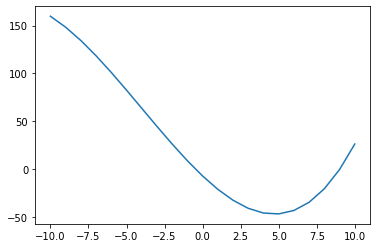

In [ ]:
# Создадим вектор (ось Х). С помощью функции arange из библиотеки numpy. И в качестве аргумента укажем числа от -10 до 11, чтобы число 10 тоже входило. 
x = np.arange(-10, 11)


# Напишем функцию, в у будут записываться все значения, в зависимости от х.
y = x * x * x/12 + x * (x-15) - 7

# С помощью функции plt.plot из библиотеки matplotlib выведем график данной функции
plt.plot(x,y)
plt.show()

##**Задача 5**

Отобразите ту же функцию на отрезке -10; 10, но с шагом 0.1 по оси x

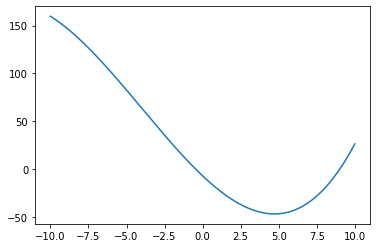

In [ ]:
# Так как отобразить функцию требуется на отрезке до 10 включительно и с шагом 0.1, то в аргументе функции нужно указать 10.1
x = np.arange(-10, 10.1, 0.1)

# Аналогично задаем функцию f(x)
y = x * x * x/12 + x * (x-15) - 7

# И выводим график на экран
plt.plot(x,y)
plt.show()